In [11]:
import json
import os
import pandas as pd
import numpy as np
import json
import glob


from scipy.spatial.distance import cdist
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import hierarchical, KMeans, MeanShift
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt
import matplotlib.lines
%matplotlib inline

import mpld3


def plot_PCA(model, data, show=True):
    cluster_assign = model.predict(data)
    pca = PCA(2)
    plot_columns = pca.fit_transform(data)
    plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=cluster_assign,)
    plt.xlabel('Canonical variable 1')
    plt.ylabel('Canonical variable 2')
    plt.title('Scatterplot of Canonical Variables for 3 Clusters')
    if show==True:
        plt.show()
    return plot_columns
    
def plot_Trunc(model, data, show=True):
    cluster_assign = model.predict(data)
    pca_2 = TruncatedSVD(2)
    plot_columns = pca_2.fit_transform(data)
    plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=cluster_assign,)
    plt.xlabel('Canonical variable 1')
    plt.ylabel('Canonical variable 2')
    plt.title('Scatterplot of Article Similarity')
    if show == True:
        plt.show()
    else:
        pass
    return plot_columns


class ClickInfo(mpld3.plugins.PluginBase):
    """mpld3 Plugin for getting info on click        """

    JAVASCRIPT = """
    mpld3.register_plugin("clickinfo", ClickInfo);
    ClickInfo.prototype = Object.create(mpld3.Plugin.prototype);
    ClickInfo.prototype.constructor = ClickInfo;
    ClickInfo.prototype.requiredProps = ["id", "urls"];
    function ClickInfo(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    ClickInfo.prototype.draw = function(){
        var obj = mpld3.get_element(this.props.id);
        urls = this.props.urls;
        obj.elements().on("mousedown",
                          function(d, i){ 
                            window.open(urls[i], '_blank')});
    }
    """
    def __init__(self, points, urls):
        self.points = points
        self.urls = urls
        if isinstance(points, matplotlib.lines.Line2D):
            suffix = "pts"
            print('whatever')
        else:
            suffix = None
            print("NOOO")
        self.dict_ = {"type": "clickinfo",
                      "id": mpld3.utils.get_id(points, suffix),
                      "urls": urls}

In [12]:
df = pd.read_csv(r'C:\Users\austi\Documents\data.csv')

# splits into 56, 24 
clus_train, clus_test = train_test_split(df, test_size=.3, random_state=22)

# Train model with 5 clusters with training data
model3=KMeans(n_clusters=5)
model3.fit(clus_train)
clusassign=model3.predict(clus_train)

clusassign

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

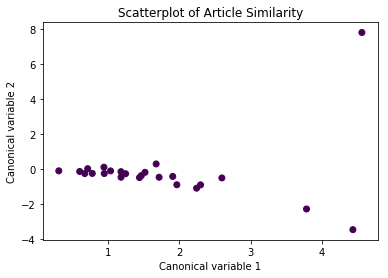

In [13]:
# Plot Test Data
plot_columns = plot_Trunc(model3, clus_test, show=False)


In [14]:
# This export data points and their associated cluster

def plot_columns_export(model, data):
    # export coordinates for each article
    plot_columns = plot_Trunc(model, data)
    #print(plot_columns)
    coordinates = pd.DataFrame.from_records(plot_columns)
    coordinates.to_csv('coordinates-scatterplot.csv', index=False)
    
    # export cluster numbers for graphing
    clusassign = model.predict(data)
    #print clusassign
    clusassign = clusassign.reshape((80,1))
    print(clusassign)
    clusassign = pd.DataFrame.from_records(clusassign)
    clusassign.to_csv('cluster-predictions.csv', index=False)
    print clusassign



In [15]:
# Creates number to url dictionary - this is just a test for now

number_to_urls = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}

# Add url to each coordinate from number to urls dictionary
num_urls = len(plot_columns)
urls = np.arange(num_urls)
#print(urls)
url_coord = []
for i in range(num_urls):
    #plot_columns[i].('www.example.com')
    url_coord.append(np.insert(plot_columns[i], 0, i))

# The first index is the key to its associate url in the dictionary number_to_urls
url_coord

[array([ 0.        ,  2.24106595, -1.08246016]),
 array([ 1.        ,  2.2967436 , -0.89347168]),
 array([ 2.        ,  1.17843018, -0.13981442]),
 array([ 3.        ,  1.67257785,  0.30212519]),
 array([ 4.        ,  1.17916625, -0.45793355]),
 array([ 5.        ,  1.96366671, -0.88789508]),
 array([ 6.        ,  4.56342388,  7.81642076]),
 array([ 7.        ,  0.71094314,  0.03259512]),
 array([ 8.        ,  0.77532693, -0.23992913]),
 array([ 9.        ,  0.94370117, -0.24488409]),
 array([ 10.        ,   1.51617082,  -0.17592637]),
 array([ 11.        ,   2.5961447 ,  -0.49747787]),
 array([ 12.        ,   3.78545028,  -2.27247092]),
 array([ 13.        ,   1.71420345,  -0.4564924 ]),
 array([ 14.        ,   0.305097  ,  -0.09226427]),
 array([ 15.        ,   1.03233946,  -0.0953002 ]),
 array([ 16.        ,   4.43708893,  -3.45455906]),
 array([ 17.        ,   0.66990635,  -0.24809992]),
 array([ 18.        ,   1.46433255,  -0.36343715]),
 array([ 19.        ,   0.59895461,  -0.12

In [16]:
# Graph our word vectors by dimensionality reduction and using mpld3
# With HTMLToolTip (no interactivity yet - see below)


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mpld3
from mpld3 import plugins

# Define some CSS to control our custom labels
css = """
table
{
  border-collapse: collapse;
}
th
{
  color: #ffffff;
  background-color: #000000;
}
td
{
  background-color: #cccccc;
}
table, th, td
{
  font-family:Arial, Helvetica, sans-serif;
  border: 1px solid black;
  text-align: right;
}
"""


fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

test_url= r'<a href="http://www.google.com/">Summary</a>'
urls = 'http://www.google.com"'

labels = []
for i in range(4):
    #label = df.ix[[i], 1:3].T
    label = number_to_urls[i]
    #print(label)
    #label = ['Row {0}'.format(i)]
    #print(label)
    # .to_html() is unicode; so make leading 'u' go away with str()
    html = r'<table class="dataframe"><thead><tr style=\"text-align: right;"><th></th><th>'+test_url+'</tr></thead><tbody><tr><th>x</th><td>0.691049</td></tr><tr><th>y</th><td>0.625353</td></tr><tr><th>z</th><td>1.370517</td></tr></tbody></table>'
    #html =r'<form method="get" action='+test_url+'><button type="submit">Go To Reserach Paper</button></form>'

    labels.append(html)
    print(html)
    
cluster_assign = model3.predict(df)
pca_2 = TruncatedSVD(2)
plot_columns = pca_2.fit_transform(df)
points = ax.plot(plot_columns[0:4,0], plot_columns[0:4, 1], 'o', color='g',
                 mec='k', ms=15, mew=1, alpha=.6)

#points = plt.subplot(x=plot_columns[:,0], y=plot_columns[:,1], c=cluster_assign,)

#points = ax.plot(plot_columns[0:4,0], plot_columns[:, 1], 'o', color='b', mec= 'k')


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Article Clusters', size=20)

tooltip = plugins.PointHTMLTooltip(points[0], labels,
                                   voffset=10, hoffset=10, css=css)
plugins.connect(fig, tooltip)
#mpld3.plugins.connect(fig, ClickInfo(points[0], urls))

mpld3.display()

<table class="dataframe"><thead><tr style=\"text-align: right;"><th></th><th><a href="http://www.google.com/">Summary</a></tr></thead><tbody><tr><th>x</th><td>0.691049</td></tr><tr><th>y</th><td>0.625353</td></tr><tr><th>z</th><td>1.370517</td></tr></tbody></table>
<table class="dataframe"><thead><tr style=\"text-align: right;"><th></th><th><a href="http://www.google.com/">Summary</a></tr></thead><tbody><tr><th>x</th><td>0.691049</td></tr><tr><th>y</th><td>0.625353</td></tr><tr><th>z</th><td>1.370517</td></tr></tbody></table>
<table class="dataframe"><thead><tr style=\"text-align: right;"><th></th><th><a href="http://www.google.com/">Summary</a></tr></thead><tbody><tr><th>x</th><td>0.691049</td></tr><tr><th>y</th><td>0.625353</td></tr><tr><th>z</th><td>1.370517</td></tr></tbody></table>
<table class="dataframe"><thead><tr style=\"text-align: right;"><th></th><th><a href="http://www.google.com/">Summary</a></tr></thead><tbody><tr><th>x</th><td>0.691049</td></tr><tr><th>y</th><td>0.62535

In [18]:
# This graph using the Click Plugin


fig, ax = plt.subplots()

labels = []
for i in range(4):
    #label = df.ix[[i], 1:3].T
    label = number_to_urls[i]
    #print(label)
    #label = ['Row {0}'.format(i)]
    #print(label)
    # .to_html() is unicode; so make leading 'u' go away with str()
    html = r'<table class="dataframe"><thead><tr style=\"text-align: right;"><th></th><th>'+test_url+'</tr></thead><tbody><tr><th>Title</th><td>Pepsi Is Amazing</td></tr><tr><th>Summary</th><td>Test summary</td></tr><tr></tr></tbody></table>'
    #html =r'<form method="get" action='+test_url+'><button type="submit">Go To Reserach Paper</button></form>'

    labels.append(html)

# TODO Use url_coord instead of recreated predictions again here. No need to recalculate. This could come from the database
# call url_coord and cluster_predictions, and url_dict to render graph and color it correctly
#TODO How will somoen search though. How do I match their query to one of our databases. Is there a smarter way to show them articles
# rather than pre-compiling graphs?

cluster_assign = model3.predict(df)
pca_2 = TruncatedSVD(2)
plot_columns = pca_2.fit_transform(df)
points = ax.plot(plot_columns[0:4,0], plot_columns[0:4, 1], 'o', color='g',
                 mec='k', ms=15, mew=1, alpha=.6)
print points
#points = ax.scatter(np.random.rand(50), np.random.rand(50),
            #        s=500, alpha=0.3)
print points   
urls = ["http://example.com/#%d"%i for i in range(4)]

        
tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                                             voffset=10,
                                                             hoffset=10)
                    
mpld3.plugins.connect(fig, tooltip)
# Add clickinfo()
plugins.connect(fig, ClickInfo(points[0], urls))
mpld3.display()

# saves this html so it can be called from database in the future. NO need to reprocess all the data
mpld3.save_html(fig, 'test.html')

whatever
